In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from zipfile import ZipFile
import requests
import io
import math
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import pandas as pd


In [55]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
response = requests.get(url)
data = pd.read_csv(url, header=None)
numerical_features = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]
data.columns = ["Class"] + numerical_features

Data exploration

In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [57]:
print(data.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Data exploration and plots

In [58]:
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Continuous Features:")
print(continuous_features)

print("Categorical Features:")
print(categorical_features)

Continuous Features:
['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
Categorical Features:
[]


In [59]:
# Define the calculate function
def calculate(numeric_vector):
    return {
        "Count": numeric_vector.count(),
        "Miss.": numeric_vector.isna().sum(),
        "Card.": numeric_vector.nunique(),
        "Min": numeric_vector.min(),
        "Q1": numeric_vector.quantile(0.25),
        "Mean": numeric_vector.mean(),
        "Median": numeric_vector.median(),
        "Q3": numeric_vector.quantile(0.75),
        "Max": numeric_vector.max(),
        "SD": numeric_vector.std()
    }

def Plan(df, features):
    numeric_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Min", "Q1", "Mean", "Median", "Q3", "Max", "SD"])
    for col in numeric_df:
        stats = calculate(numeric_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan


data_quality_plan1 = Plan(data, continuous_features)
data_quality_plan1.loc[:, "Count":"SD"] = data_quality_plan1.loc[:, "Count":"SD"].round(1)

#data_quality_plan1

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan1.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan1[column] for column in data_quality_plan1.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=600)  # Adjust the size of the figure
fig.show()
data_quality_plan1.to_csv("tables/data_quality_plan1.csv", index=False)

C:\Users\tiaan\AppData\Local\Temp\ipykernel_36608\74738848.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



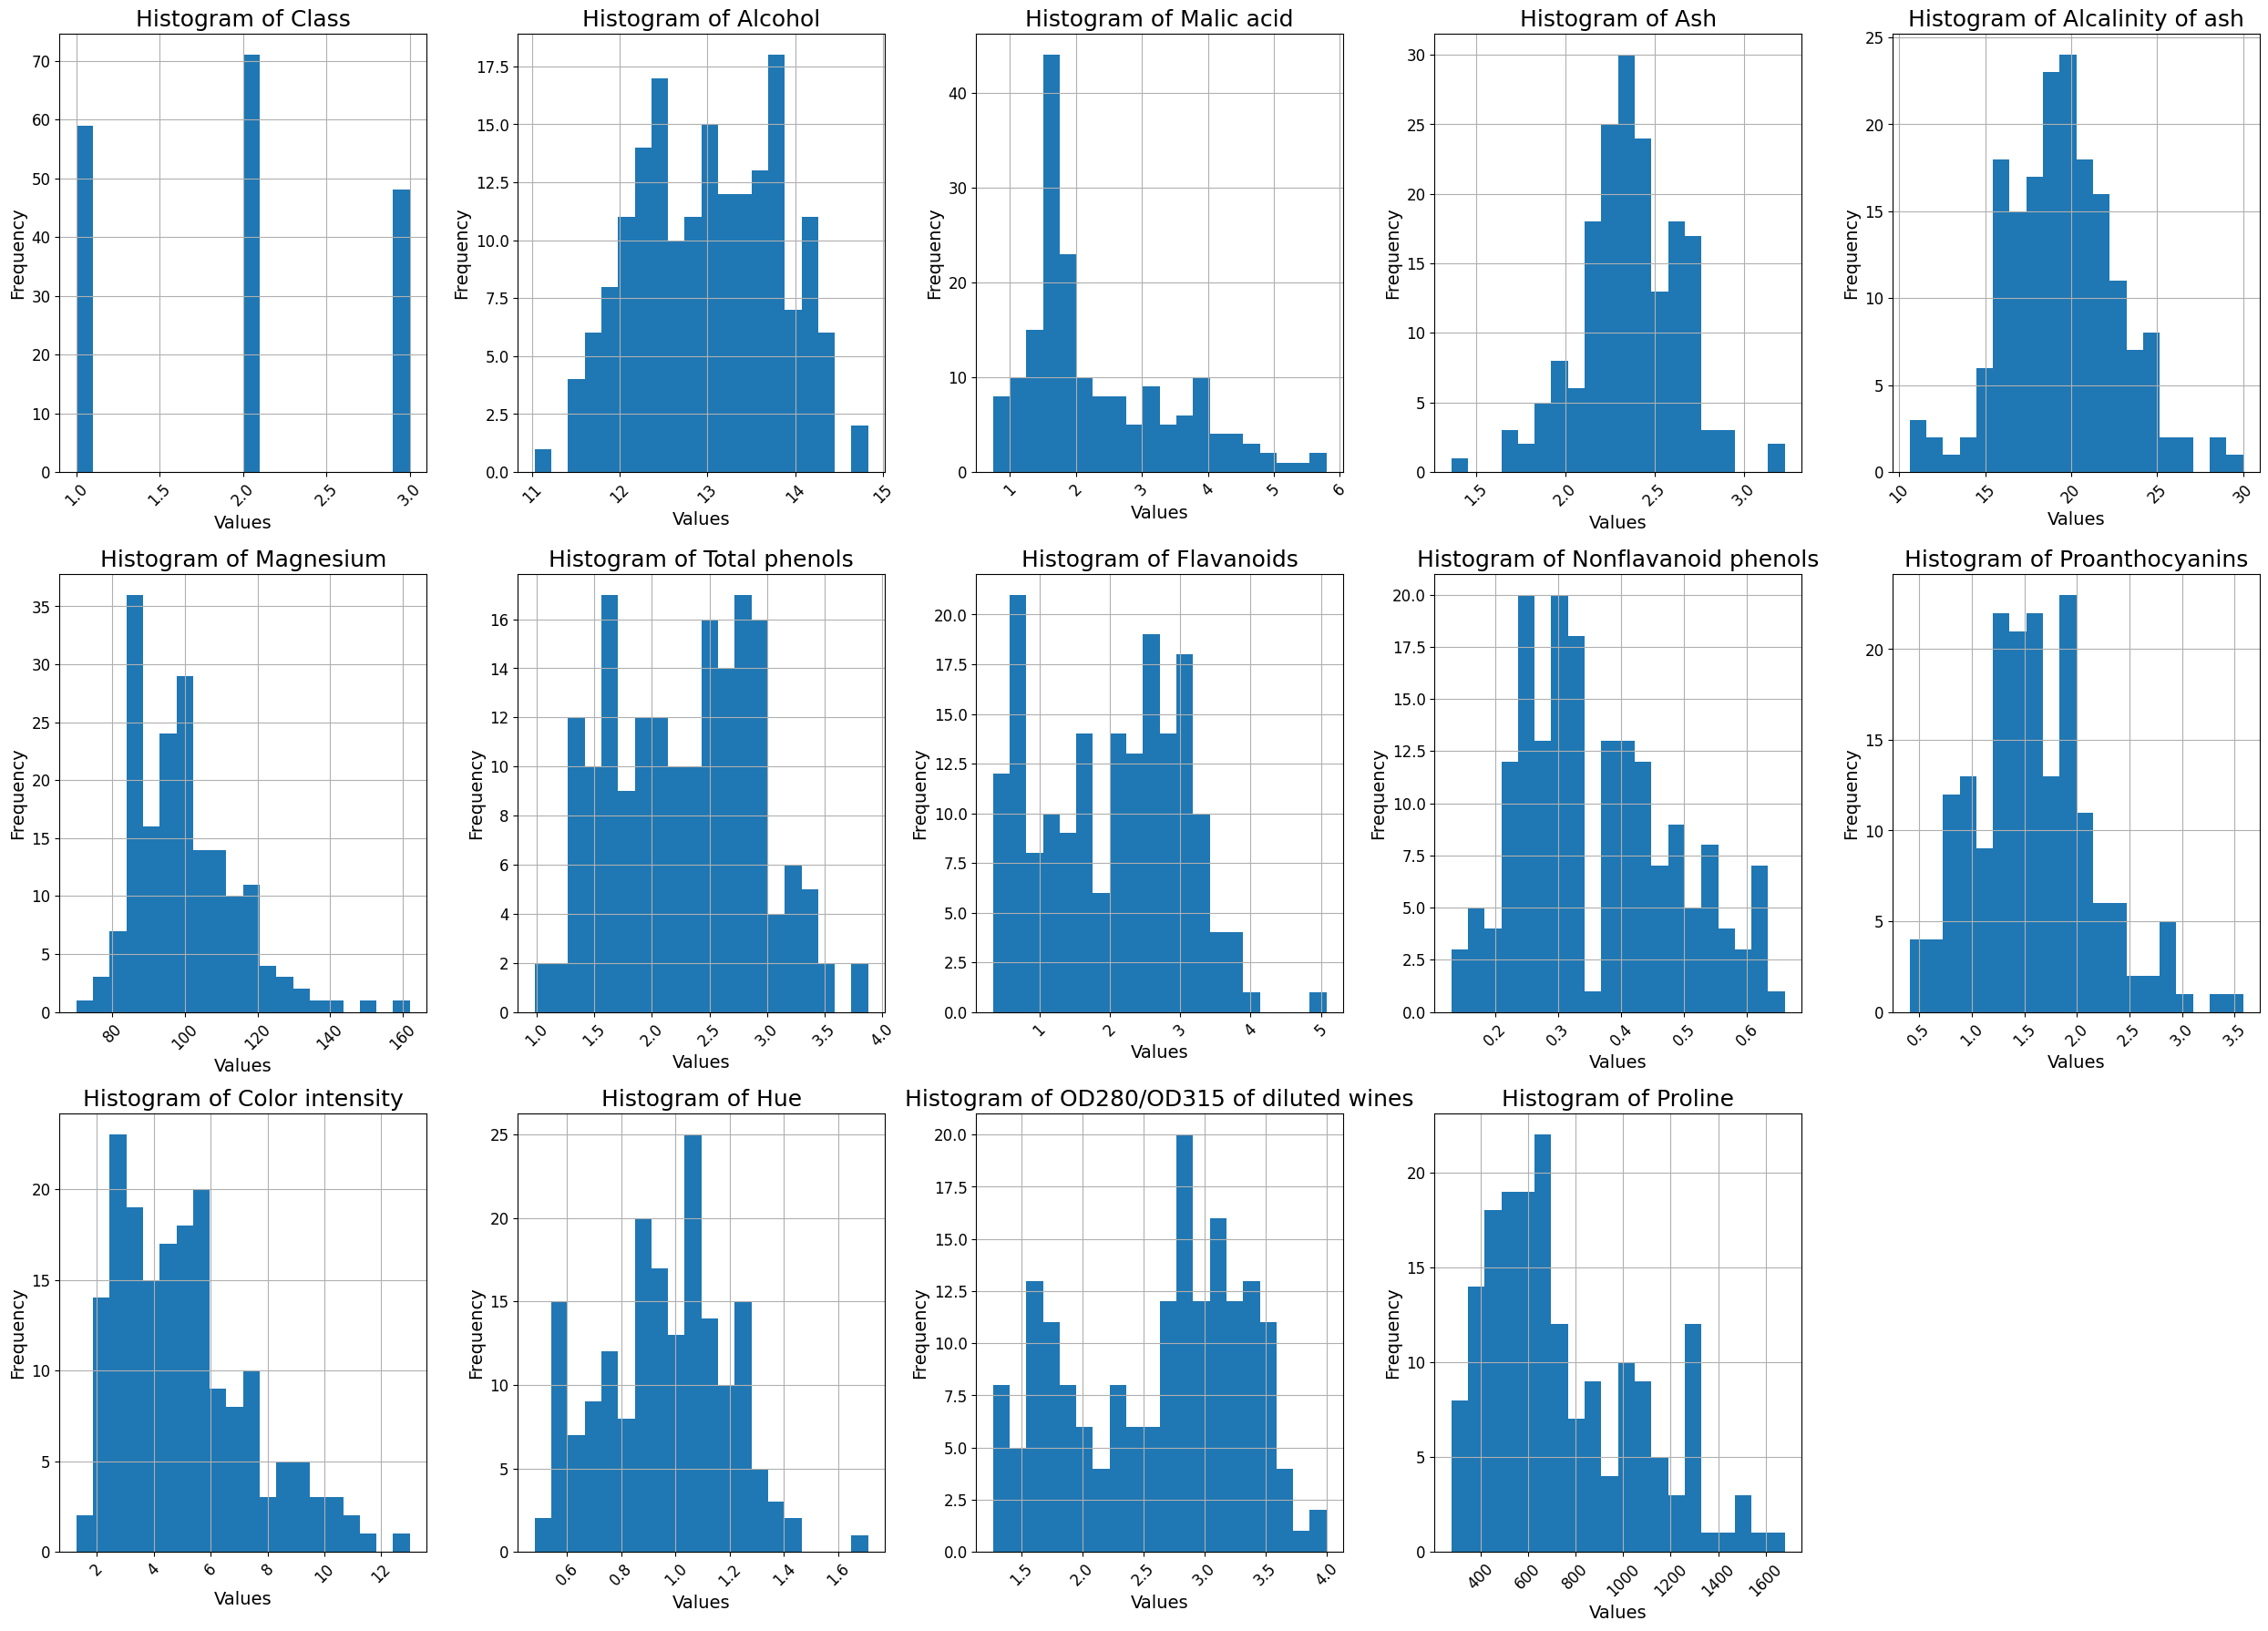

In [60]:
# Determine the number of rows and columns for the subplot grid
n = len(continuous_features)
ncols = 5
nrows = math.ceil(n / ncols)

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, feature in enumerate(continuous_features):
    data[feature].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=18)
    axes[i].set_xlabel('Values', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Remove unused subplots
if n < nrows * ncols:
    for i in range(n, nrows * ncols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [61]:
# Define the calculate function for categorical features
def calculate_categorical(vector):
    stats = {
        "Count": vector.count(),
        "Miss.": vector.isna().sum(),
        "Card.": vector.nunique()
    }
    
    # Calculate mode and related statistics
    mode_data = vector.mode()
    if len(mode_data) > 0:
        mode_val = mode_data[0]
        mode_count = vector.value_counts().iloc[0]
        stats["Mode"] = mode_val
        stats["Mode Freq"] = mode_count
        stats["Mode %"] = (mode_count / stats["Count"]) * 100
    else:
        stats["Mode"] = np.nan
        stats["Mode Freq"] = np.nan
        stats["Mode %"] = np.nan
    
    # Calculate second mode and related statistics if possible
    if vector.value_counts().shape[0] > 1:
        second_mode_val = vector.value_counts().index[1]
        second_mode_count = vector.value_counts().iloc[1]
        stats["2nd Mode"] = second_mode_val
        stats["2nd Mode Freq"] = second_mode_count
        stats["2nd Mode %"] = (second_mode_count / stats["Count"]) * 100
    else:
        stats["2nd Mode"] = np.nan
        stats["2nd Mode Freq"] = np.nan
        stats["2nd Mode %"] = np.nan

    return stats

def Plan_categorical(df, features):
    categorical_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Mode", "Mode Freq", "Mode %", "2nd Mode", "2nd Mode Freq", "2nd Mode %"])
    for col in categorical_df:
        stats = calculate_categorical(categorical_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan

data_quality_plan2 = Plan_categorical(data, categorical_features)
data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]] = data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]].round(1)
data_quality_plan2.to_csv("tables/data_quality_plan2.csv", index=False)

#data_quality_plan2

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan2.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan2[column] for column in data_quality_plan2.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=800)  # Adjust the size of the figure
fig.show()

In [62]:
import math
import matplotlib.pyplot as plt


# Check if there are any categorical features
if categorical_features:
    n = len(categorical_features)
    ncols = 3  # Change the number of columns to 3
    nrows = math.ceil(n / ncols)

    # Create the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))

    # Flatten the axes array
    axes = axes.flatten()

    # Plot bar plots for each categorical feature
    for i, feature in enumerate(categorical_features):
        data[feature].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Bar Plot of {feature}', fontsize=18)
        axes[i].set_xlabel('Values', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    # Remove unused subplots
    if n < nrows * ncols:
        for i in range(n, nrows * ncols):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features to plot.")

No categorical features to plot.


Data preprocessing

### Remove Low Variance Features:

In [63]:
variances = data[continuous_features].var()
low_variance_features = variances[variances < 0.01].index.tolist()
filtered_continuous_features = [f for f in continuous_features if f not in low_variance_features]

print("Low Variance Features Removed:", low_variance_features)
print("Filtered Continuous Features:", filtered_continuous_features)


Low Variance Features Removed: []
Filtered Continuous Features: ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


### Correlation Analysis

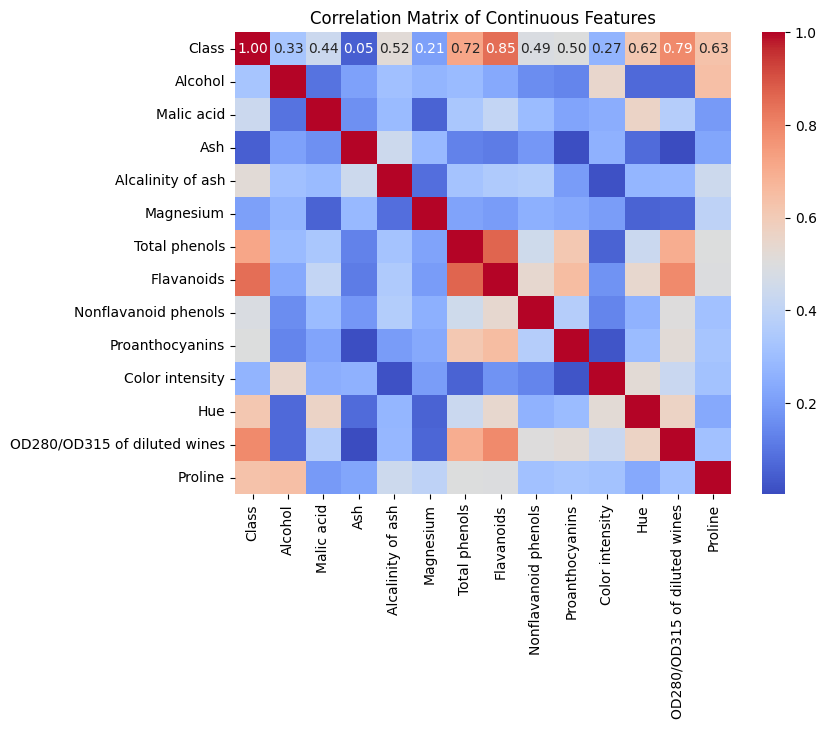

In [64]:
# Calculate correlation matrix
correlation_matrix = data[continuous_features].corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()


In [65]:
import numpy as np

# Assuming filtered_continuous_features is defined somewhere in your code
# filtered_continuous_features = [...]

correlation_matrix = data[filtered_continuous_features].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print the features that are being removed
print("Highly correlated features (correlation > 0.9):", highly_correlated_features)

filtered_continuous_features = [f for f in filtered_continuous_features if f not in highly_correlated_features]
print("Features after removing high correlation:", filtered_continuous_features)

Highly correlated features (correlation > 0.9): []
Features after removing high correlation: ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

filtered_continuous_features = [feature for feature in filtered_continuous_features if feature != 'Class']

X = data[filtered_continuous_features]

# Encode the 'Class' feature
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': filtered_continuous_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


                         Feature  Importance
6                     Flavanoids    0.515763
12                       Proline    0.211679
11  OD280/OD315 of diluted wines    0.100834
9                Color intensity    0.100530
0                        Alcohol    0.042125
10                           Hue    0.013979
4                      Magnesium    0.003769
3              Alcalinity of ash    0.003374
1                     Malic acid    0.002607
2                            Ash    0.002222
8                Proanthocyanins    0.001367
5                  Total phenols    0.001009
7           Nonflavanoid phenols    0.000742


In [67]:
# Select numerical features

numerical_features = ['Flavanoids', 'Proline', 'OD280/OD315 of diluted wines', 'Color intensity', 'Alcohol', 'Hue']

#X = data[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

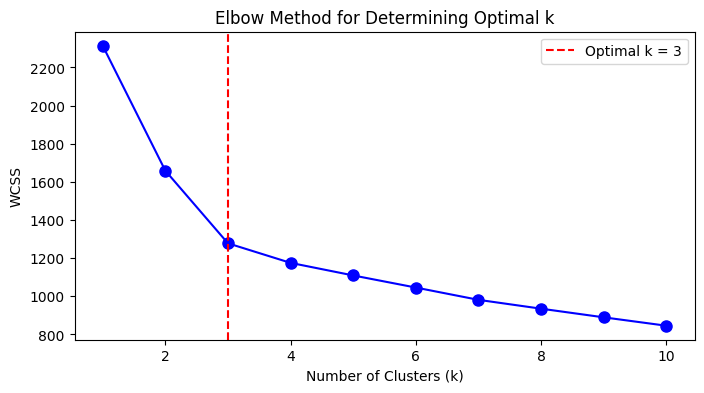

Optimal number of clusters: 3


In [68]:
import time
import numpy as np
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



def determine_optimal_clusters(X, max_k=10):
    """
    Determine the optimal number of clusters using the elbow method.

    Args:
        X (np.ndarray): The dataset, where rows are samples and columns are features.
        max_k (int): The maximum number of clusters to consider.

    Returns:
        int: The optimal number of clusters.
    """
    wcss = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    knee_locator = KneeLocator(
        range(1, max_k + 1), wcss, curve="convex", direction="decreasing"
    )
    elbow_point = knee_locator.knee

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), wcss, 'bo-', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Determining Optimal k')
    plt.axvline(elbow_point, linestyle='--', color='r', label=f'Optimal k = {elbow_point}')
    plt.legend()
    plt.show()

    if elbow_point is None:
        raise ValueError("KneeLocator could not find an optimal number of clusters.")
    
    return elbow_point


# Determine optimal number of clusters
optimal_clusters = determine_optimal_clusters(X_scaled, max_k=10)
print(f"Optimal number of clusters: {optimal_clusters}")



In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform, cdist
import numpy as np

# K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_wcss = kmeans.inertia_



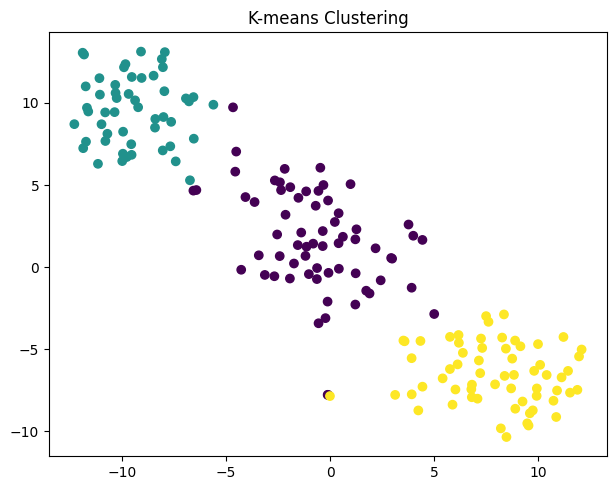

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.tight_layout()
plt.show()